<a href="https://colab.research.google.com/github/deepakbharadwaj99/deepakbharadwaj99/blob/main/diabetes_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
fileDownloaded = drive.CreateFile({'id':'1pHS0OoWAZXT4ZG8EeGDjgkcgwIG3PwXu'})
fileDownloaded.GetContentFile('diabetes_1.csv')

In [5]:
df = pd.read_csv('diabetes_1.csv' )

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#checking for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#checking for duplicacies in the dataset
df.duplicated().sum()

0

In [12]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

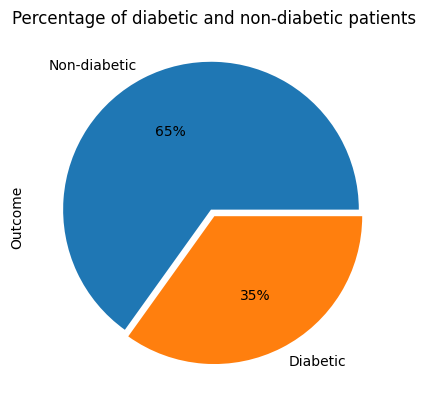

In [16]:
#Percentage of Diabetic to Non-Diabetic Patients
colors = ['orange','skyblue']
plt.title('Percentage of diabetic and non-diabetic patients')
df["Outcome"].value_counts().plot(kind='pie', labels = ['Non-diabetic', 'Diabetic'], explode=[0.05,0],autopct='%1.0f%%')
plt.show()

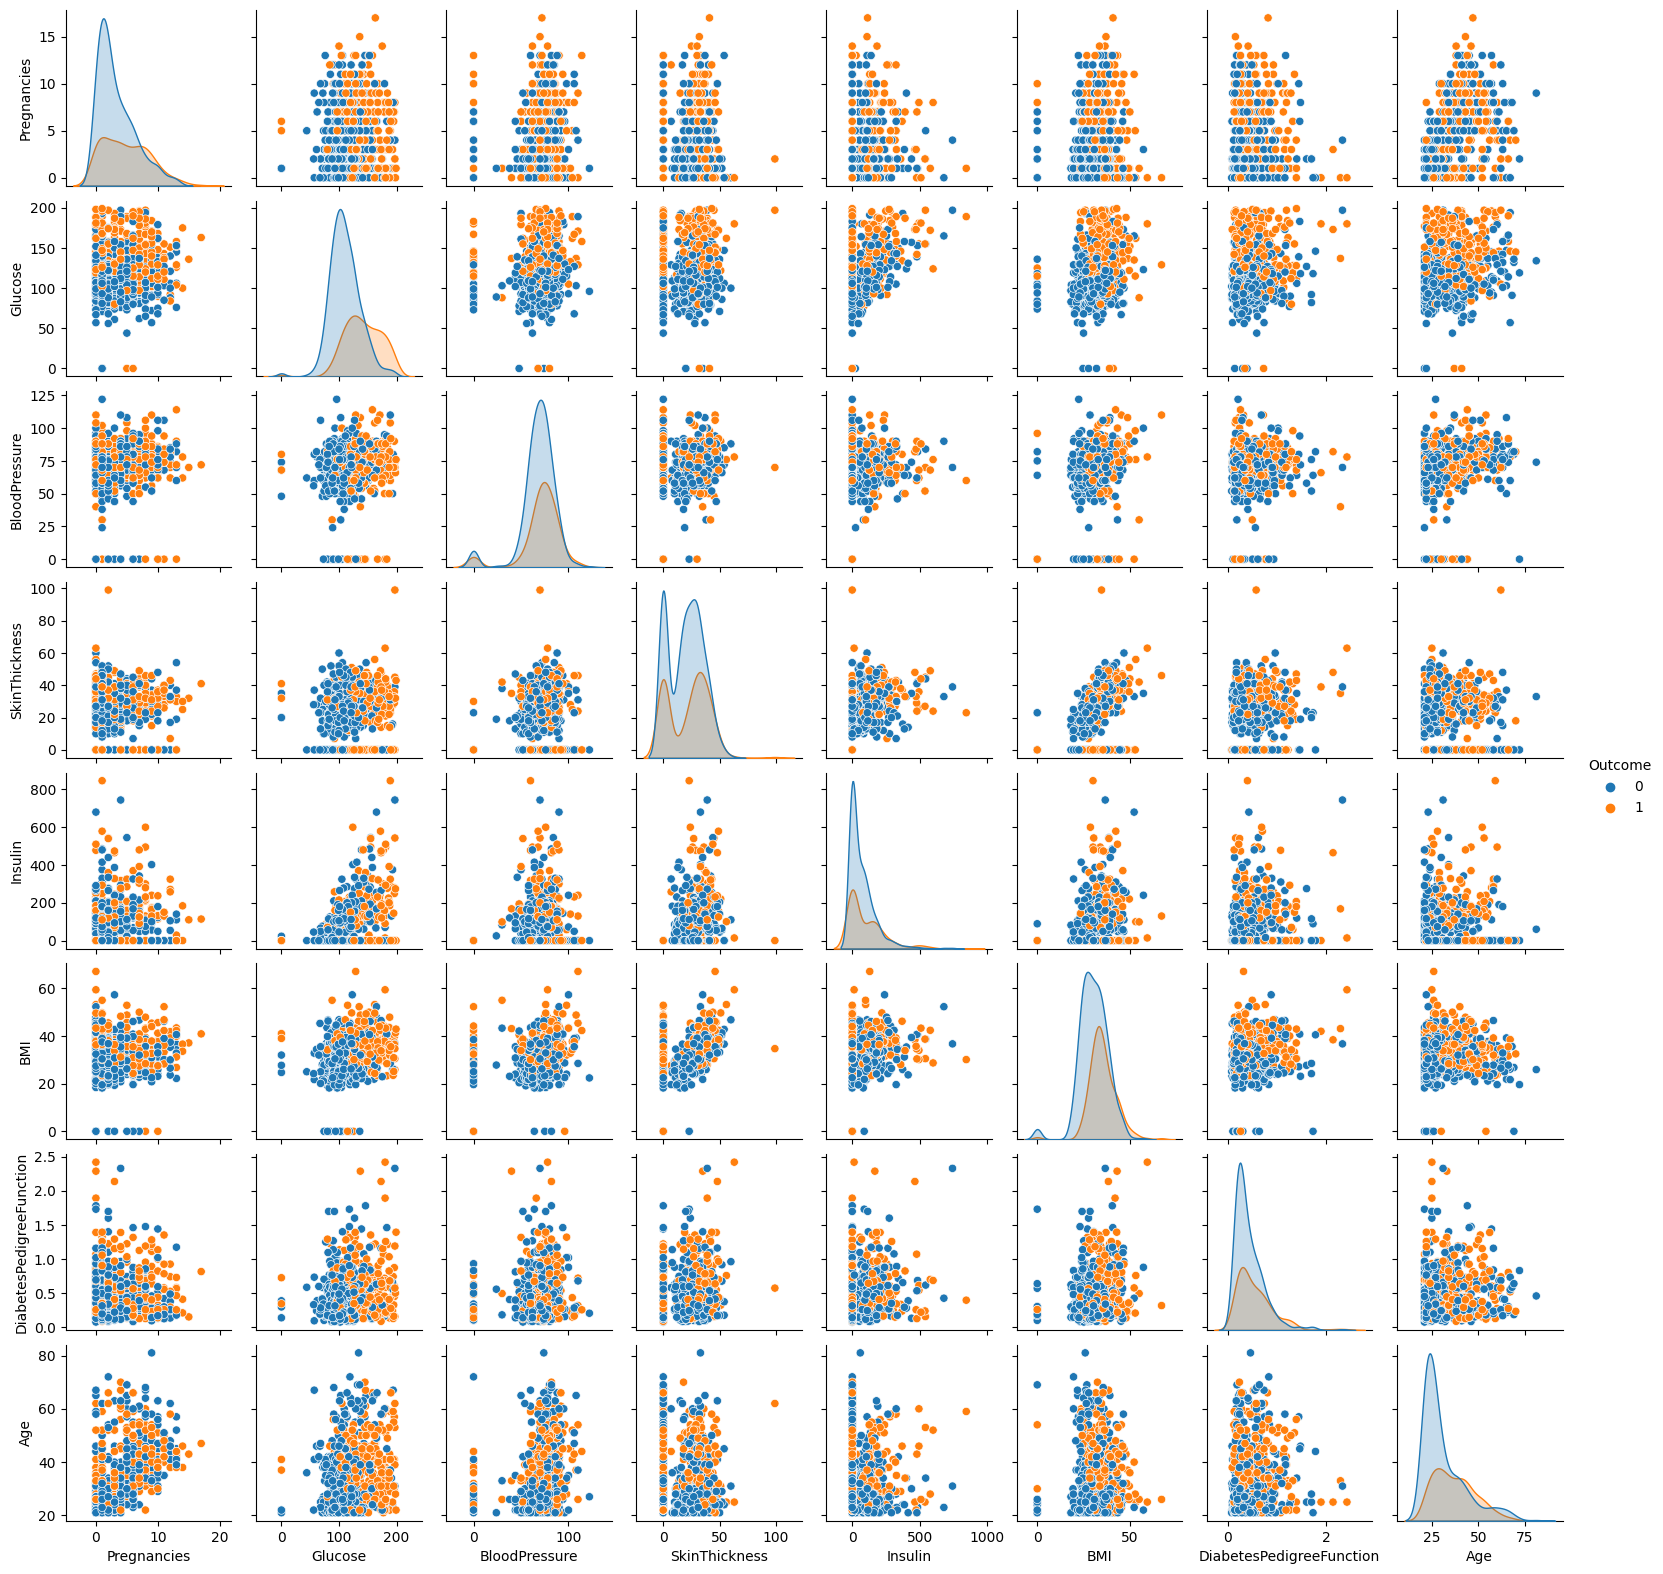

In [17]:
#Visualizing the multidimensional relationships among the Features
sn.pairplot(df,hue= 'Outcome',height= 2)

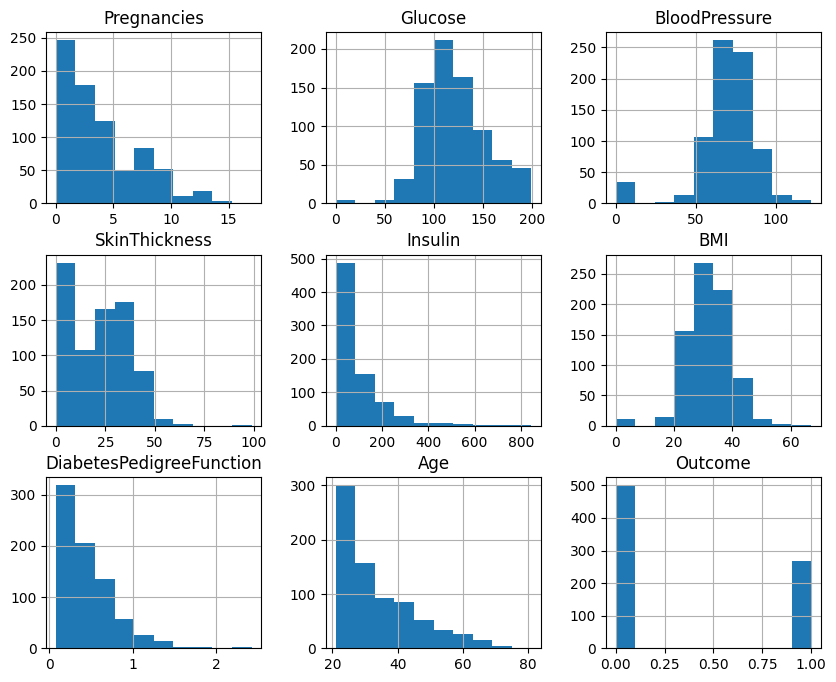

In [18]:
#plot histogram

df.hist(figsize= (10,8))
plt.show()


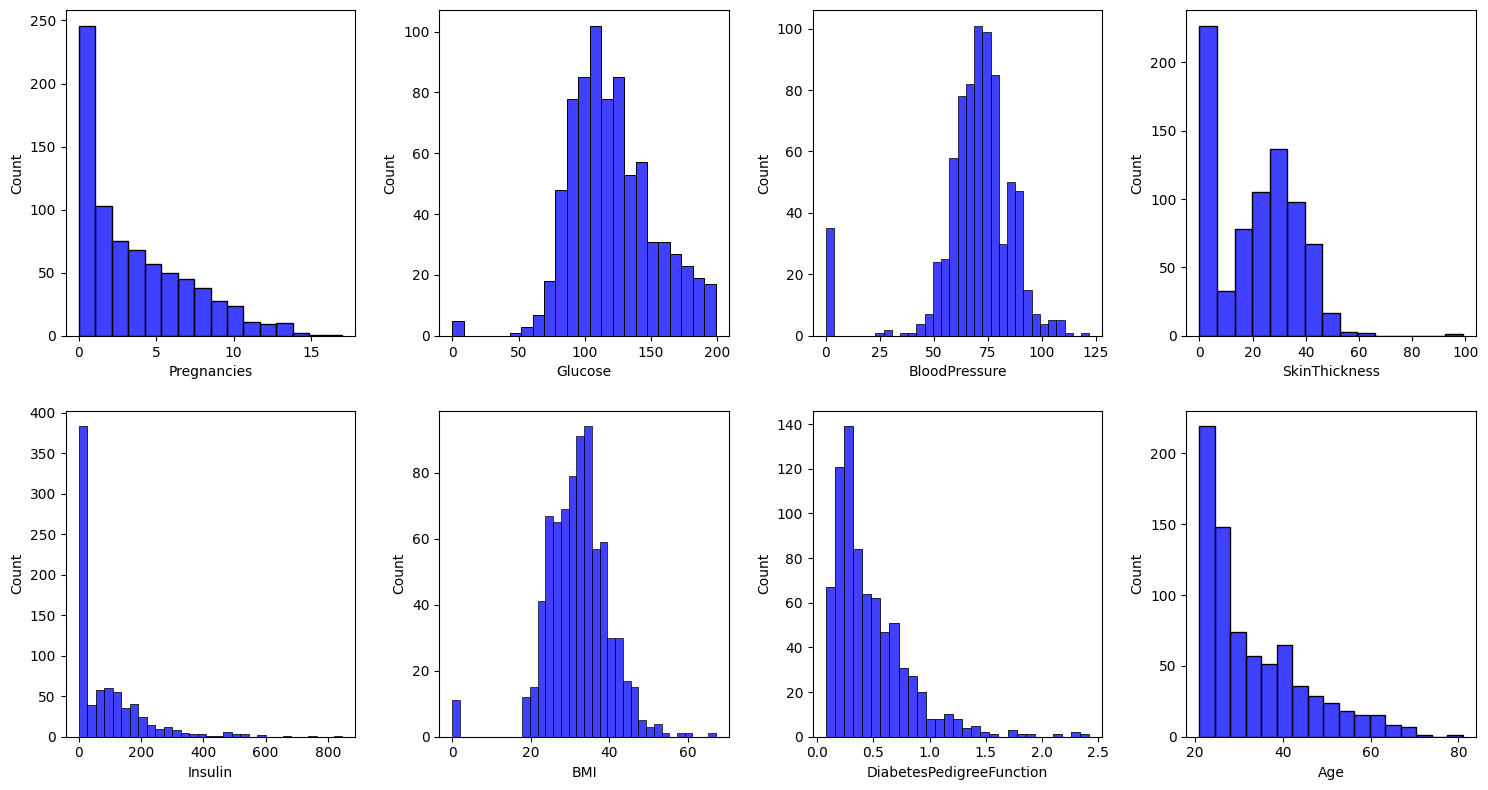

In [19]:
# distribution of features
fig, axes = plt.subplots(2,4, figsize= (15,8))
ax = axes.flatten()

for x, col in enumerate(df.columns[:-1]):
  sn.histplot(df[col],ax= ax[x],color= 'blue')

fig.tight_layout(w_pad = 1.5, h_pad = 2)
plt.show()

 Insight - Glucose, BloodPressure and BMI are normally distributed hence showing normal distribution curve

In [21]:
#relationship of variables with outcome
features = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

#creating figures and sub plots
for i , column in enumerate(features):
  sn.boxplot(x='Outcome', y= column, palette={'orange','skyblue'}, data = df, ax=axes[i//4][i%4])

#adjusting layout and display the plots
fig.tight_layout(w_pad=1 ,h_pad= 1.5)
plt.show()

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

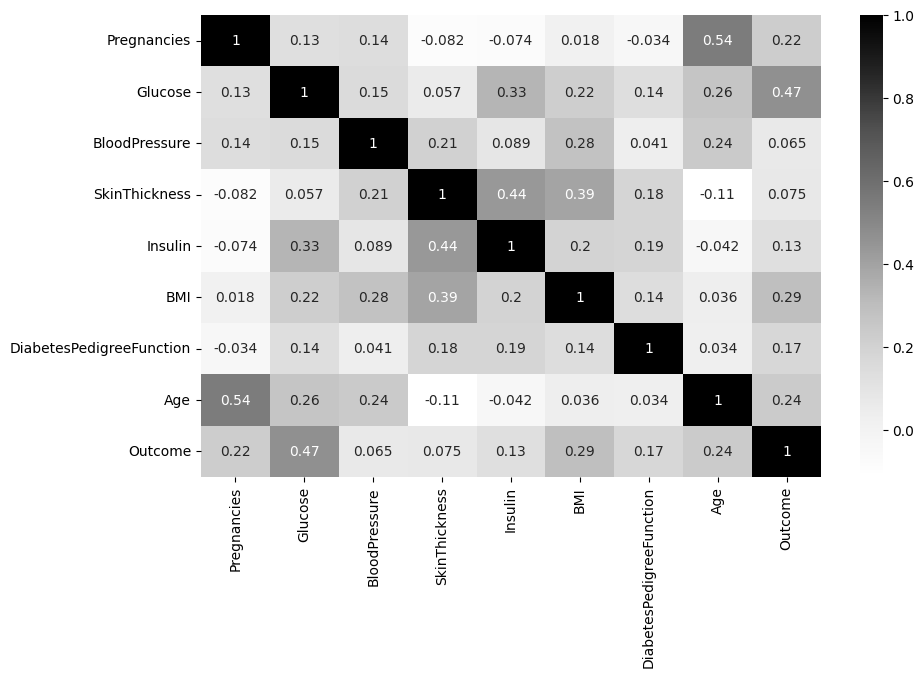

In [23]:
plt.figure(figsize = (10,6))
sn.heatmap(df.corr(), annot= True, cmap= 'Greys')

Insight -  Glucose and BMI have stronger positive correlation with diabetes outcome.

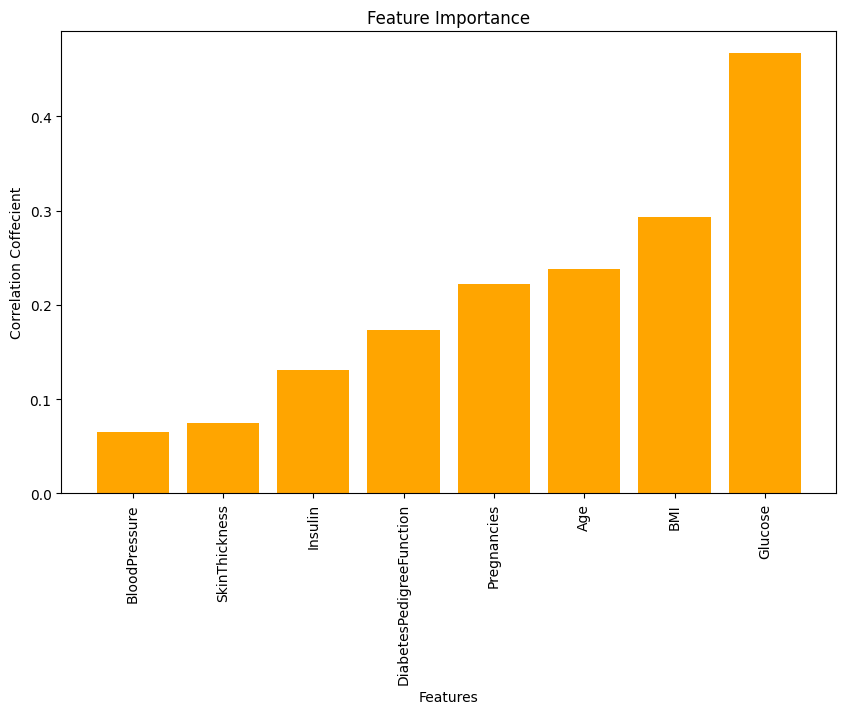

In [24]:
# Compute the correlation between each feature and the label/target feature
correlation = df.corr()["Outcome"].drop("Outcome")

#Sorting feature based on their correlation with the label feature
sorted_features = correlation.sort_values(ascending = True)

#Plot the feature importace chart using a bar chart
plt.figure(figsize=(10,6))
plt.bar(sorted_features.index, sorted_features.values, color='orange')
plt.xlabel("Features")
plt.ylabel("Correlation Coffecient")
plt.title("Features Importance")
plt.xticks(rotation = 90)
plt.show()

Insight - Glucose appears to be more significant feature in predicting diabetes outcome

In [25]:
#Importing Machine learning Models
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [26]:
#splitting the data into features and labels
x = df.drop(["Outcome"], axis= 1) # dropping the variable Outcome
y = df["Outcome"]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# **Building Model**

In [28]:
#splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1234)

# **LogisticRegression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#training the model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
#prediction from the test data
log_reg.predict(x_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [32]:
# saving the prediction
logistic_prediction = log_reg.predict(x_test)

In [33]:
#preparing a confusion matrix for evaluation of classification algorithms

def ConfusionMatrix(ytest, ypred, label = ["Negative","Positive"] ):
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(ytest,ypred)

  plt.figure(figsize= (7,5))
  sn.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greys'  )

  plt.xlabel('Predicted')
  plt.ylabel('Truth')

  plt.yticks([0.5,1.5], label)
  plt.xticks([0.5,1.5], label)

  plt.title('Confusion Matix');


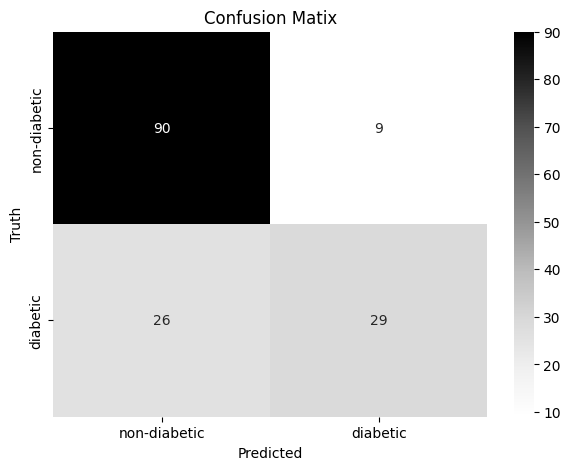

In [35]:
ConfusionMatrix(y_test, logistic_prediction, label = ["non-diabetic","diabetic"])

1. 90 true negatives(TN). predicting the patient to be non-diabetic and truly the patient is non- diabetic.
2. 9 false positives(FP).. predicting the patient be diabetic but in truth its non- diabetic.
3. 26 false negative(FN).. predicting the patient to be non- diabetic but in truth its diabetic.
4. 29 true positive(TP) ... predicting the patient to be diabetic and truely the patient is diabetic

In [49]:
# Evaluating the LogisticRegression model
#checking the accuracy to the model and the f1_score

accuracy = metrics.accuracy_score(y_test, logistic_prediction)*100
print("accuracy score of the LogisticRegression Model is",accuracy)

f1score= metrics.f1_score(y_test, logistic_prediction)*100
print("f1_score of the LogisticRegression model is ",f1score)

accuracy score of the LogisticRegression Model is 77.27272727272727
f1_score of the LogisticRegression model is  62.365591397849464


# **Random Forest Model**

In [50]:
#importing random forest Model
from sklearn.ensemble import RandomForestClassifier

#training the model
randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
#prediction of random forest model

randomforestmodel_prediction = randomforestmodel.predict(x_test)
randomforestmodel_prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

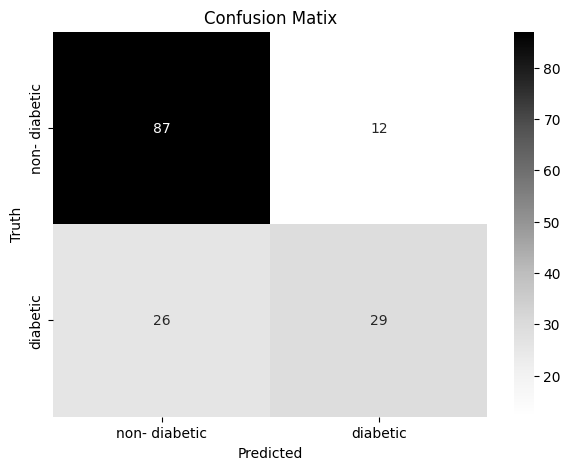

In [54]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label = ["non- diabetic","diabetic"])

1. 87 True Negative-  TN
2. 12 False Positive - FP
3. 26 False Negative - FN
4. 29 True Positive - TP

In [59]:
# Evaluating the RandomForest Model

Accuracy = metrics.accuracy_score(y_test,randomforestmodel_prediction)*100
print("accuracy score of random forest model is" ,Accuracy)
f1score= metrics.f1_score(y_test, radomforestmodel_prediction)*100
print("f1score or random forest model is ",f1score)

accuracy score of random forest model is 75.32467532467533
f1score or random forest model is  60.416666666666664


# **Naive Bayes Model**

In [61]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()

naivemodel.fit(x_train, y_train)

GaussianNB()

In [63]:
naivemodel_prediction = naivemodel.predict(x_test)
naivemodel_prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

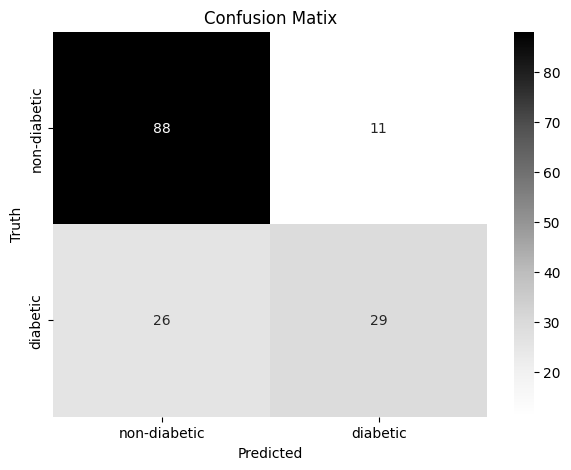

In [64]:
ConfusionMatrix(y_test, naivemodel_prediction, label = ["non-diabetic","diabetic"])

1. 88 True Negatives - TN
2. 11 False Positives - FP
3. 26 False Negatives - FN
4. 29 True Postivies - TP


In [66]:
  Accuracy = metrics.accuracy_score(y_test, naivemodel_prediction)*100
  print("accuracy score of naivemodel is " , Accuracy)

  f1score = metrics.f1_score(y_test, naivemodel_prediction)*100
  print("f1score of naivemodel is ", f1score)

accuracy score of naivemodel is  75.97402597402598
f1score of naivemodel is  61.052631578947356



# Conclusion
-Trained three models - LogisticRegression , RandomForestModel and Naive Bayes Model
-The accuracy_score and f1_score of the LogisticRegression Model is better as compared to other models.
